In [1]:
# Import Libraries needed
from maddux.environment import Environment
from maddux.objects import Obstacle
from maddux.robots.arm import Arm
from maddux.robots.link import Link

import numpy as np

In [2]:
# Create links using DH Parameters (angle, length, offset, twist)
L1 = Link(0, 3.4, 0, np.pi/2)
L2 = Link(0, 0, 0, -np.pi/2)
L3 = Link(0, 4, 0, -np.pi/2)
L4 = Link(0, 0, 0, np.pi/2)
L5 = Link(0, 4, 0, np.pi/2)
L6 = Link(0, 0, 0, -np.pi/2)
L7 = Link(0, 1.26, 0, 0)
links = np.array([L1 ,L2, L3, L4, L5, L6, L7])

In [3]:
# Set Initial Joint angles
q0 = np.array([0] * 7)

In [4]:
# Create Robot
robot = Arm(links, q0, 'KUKA iiwa')

In [5]:
# Setup Environment and goal
goal = [1,6,6]
goal_size = 0.1
env = Environment(robot = robot, static_objects = [Obstacle((np.asarray(goal) - goal_size).tolist(),
                                                            (np.asarray(goal) + goal_size).tolist())])

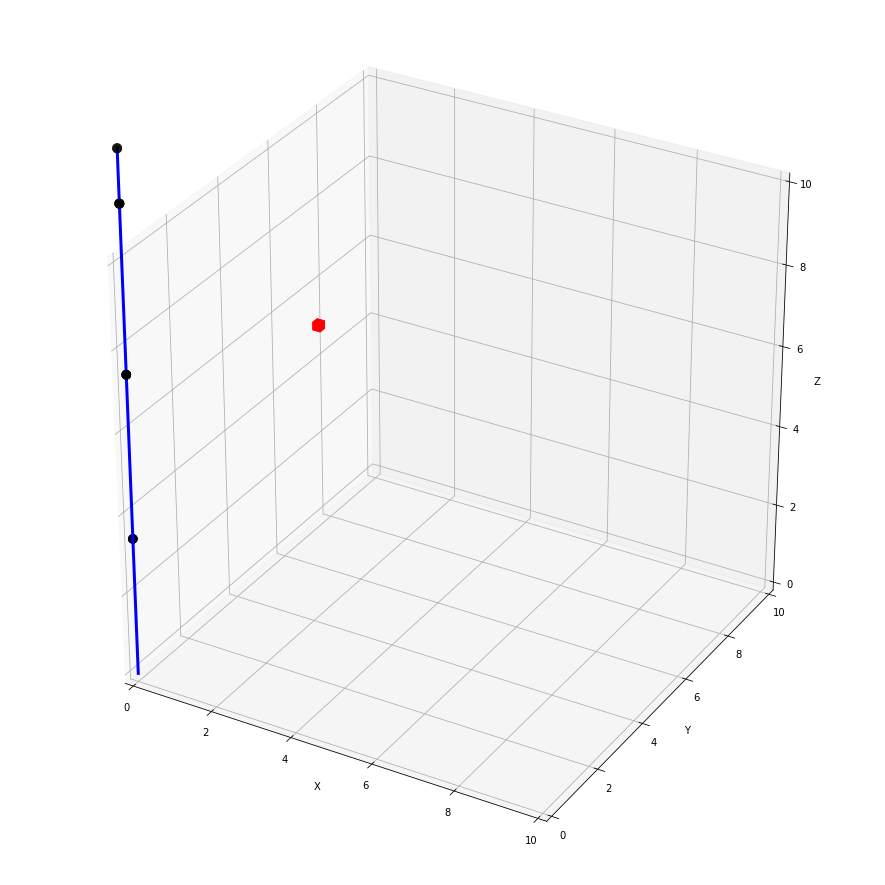

In [6]:
# Show Initial robot pose w/ goal
env.plot()

In [7]:
# Run Inverse Kinematics (Position Only)
qf = robot.ikine(goal)

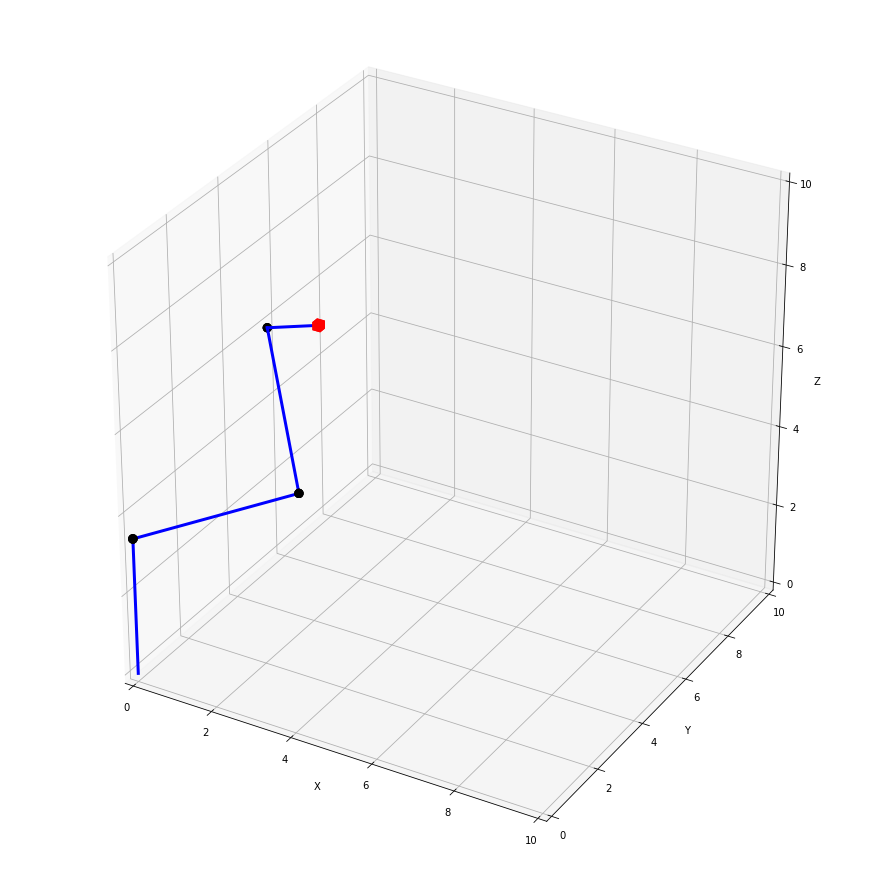

In [8]:
# Show new position
robot.update_angles(qf)
env.plot()

In [9]:
# Print out FK of new pose
fk = robot.fkine()
print("R: \n {}\n {}\n {}\n").format(fk[0,0:3], fk[1,0:3], fk[2,0:3])
print("d: \n {}\n {}\n {}\n").format(fk[0,3], fk[1,3], fk[2,3])

R: 
 [[0.27829607 0.05196206 0.95908876]]
 [[-0.66423211  0.73168097  0.15309692]]
 [[-0.69379176 -0.67966382  0.2381388 ]]

d: 
 0.999999964846
 5.9999991791
 5.99999963284

